In [160]:
# Importering av bibliotek 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ladda datan
housing = pd.read_csv("housing.csv") # Laddar data från samma folder

# Kollar hur filen ser ut
print(housing.iloc[0:2])
print(housing.iloc[-3:])
# print(housing.head(3))
# print(housing.tail(3))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.

In [161]:
# Kollar grundläggande data om filen
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


En första analys: 

Det handlar om områden och vad som gäller för boenden i olika område.
De rader vi har tillhanda:
longitude, latitude: geografisk position av området 
housing_median_age: median-ålder på husen i området
total_rooms: totala antal rum i området
total_bedrooms: totala antal sovrum i området
population: folkmängd i området
households: antal hushåll i området  
median_income: median-inkomsten i området  
median_house_value: median-värde på husen i området
ocean_proximity: området närhet till vatten/ocean

20640 rader, null-element i total_bedrooms

Nästa steg: non-null analys

In [ ]:
# Dubbelkollar antal null med .isnull().sum()

print(housing.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


Analys: 

Det finns bara null-värden i total_bedrooms, ca 1%. Sovrum känns inte jätteviktigt och det är så få så dessa tas bort för att få renare data (dropna(inplace=True))



In [163]:
housing.dropna(inplace=True)

Analys:

Nästa steg ta fram histogram för att titta närmare på datan.

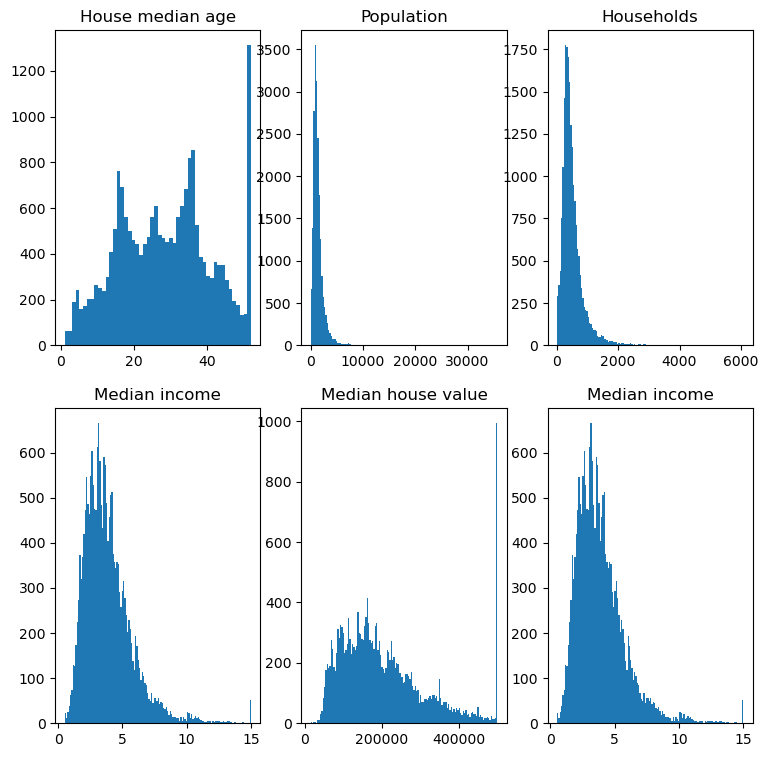

In [164]:
fig, axs = plt.subplots(2, 3, figsize=(9, 9))
axs[0, 0].hist(housing['housing_median_age'], bins=50)
axs[0, 0].set_title("House median age") # Titel på plot

axs[0, 1].hist(housing['population'], bins=140)
axs[0, 1].set_title("Population") # Titel på plot

axs[0, 2].hist(housing['households'], bins=140)
axs[0, 2].set_title("Households") # Titel på plot

axs[1, 0].hist(housing['median_income'], bins=140)
axs[1, 0].set_title("Median income") # Titel på plot

axs[1, 1].hist(housing['median_house_value'], bins=140)
axs[1, 1].set_title("Median house value") # Titel på plot

axs[1, 2].hist(housing['median_income'], bins=140)
axs[1, 2].set_title("Median income") # Titel på plot

plt.show()

Analys:

Graferna ser rimliga ut. Det som står ut är det är ganska smala bins och ändå dyker det upp spikar i slutet av ålder, inkomst och husvärde. Jag ser hypotesen är att man grupperat sista delen av svansen dvs man har angivit exakta t ex husvärden upp till ett visst tal x, sen tagit "x+1 år eller äldre" på den sista. Jag ska se som hypotesen stämmer:
- lista antal per ålder, inkomst och husvärde och kontrollera de högsta värdena


In [ ]:
# Husets ålder
# Räknar värden per värde (inkomst), ger en series (pandas.core.series.Series)
number_per_value = housing.value_counts("housing_median_age") 
print(type(number_per_value)) # Verifierar typ

# Sorterar listan via series index (första "kolumnen")
sort_by_value = number_per_value.sort_index(ascending=False) 

# Skriver ut för de intressanta värdena
print("Husets ålder")
print(sort_by_value.head(5))

# Median-inkomst
# Räknar värden per värde (inkomst), ge en series
number_per_value = housing.value_counts("median_income") 

# Sorterar listan via series index (första "kolumnen")
sort_by_value = number_per_value.sort_index(ascending=False) 

# Skriver ut för de intressanta värdena
print("Inkomst")
print(sort_by_value.head(5))

# Husets värde
# Räknar värden per värde (värde), ge en series
number_per_value = housing.value_counts("median_house_value") 

# Sorterar listan via series index (första "kolumnen")
sort_by_value = number_per_value.sort_index(ascending=False) 

# Skriver ut för de intressanta värdena
print("Husets värde")
print(sort_by_value.head(5))

<class 'pandas.core.series.Series'>
Husets ålder
housing_median_age
52.0    1265
51.0      47
50.0     135
49.0     133
48.0     174
Name: count, dtype: int64
Inkomst
median_income
15.0001    48
15.0000     2
14.9009     1
14.5833     1
14.4219     1
Name: count, dtype: int64
Husets värde
median_house_value
500001.0    958
500000.0     27
499100.0      1
499000.0      1
498800.0      1
Name: count, dtype: int64


Analys:

I alla tre fallen pekar det på att man grupperat ihop svansen och lagt som högsta värde. I husvärde finns också ett utstickande fall för 500000.0, jag gissar att det beror på att det är ett jämnt värde och det tenderar alltid finnas fler värden på jämna värde om det är något som är manuellt uppskattat. Ca 2000 rader finns i de grupperade svansarna (troligen kommer det finnas ett överlapp t ex några med väldigt hög inkomst kommer säkert finnas med i svansen på väldigt högt husvärde etc), dvs ca 10%.

Ska yttervärdena raderas pga av grupperingen? Inte per automatik, men för att få ett snyggt dataset så tar vi bort de utstickande raderna.

Dvs ta bort:
housing_median_age med värdet 52.0
median_income 15.0001
median_house_value 500001.0

Vi skapar en ny version där vi exkluderar dessa värden:

housing = housing[housing['housing_median_age'] != 52.0]

housing = housing[housing['median_income'] != 15.0001]

housing = housing[housing['median_house_value' != 500001.0]

Och kör housing.info() före och efter och kontrollerar hur många fält som tagits bort.



In [166]:
housing.info()
housing = housing[housing['housing_median_age'] != 52.0]
housing = housing[housing['median_income'] != 15.0001]
housing = housing[housing['median_house_value'] != 500001.0]
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 18377 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18377 non-null  float64
 1   

Analys:

2056 rader har tagits bort. 1295 + 48 + 958 = 2301 var summerat det högsta antalet per kategori, och det är helt rimligt att samma outlier är med i flera av kategorierna dvs färre togs bort.

Vi tittar på graferna igen.



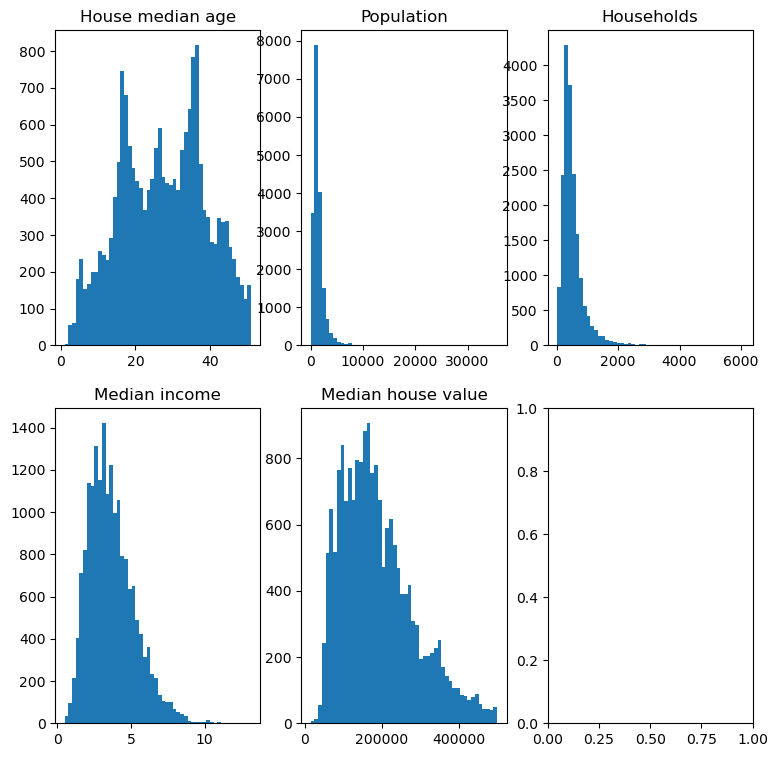

In [167]:
fig, axs = plt.subplots(2, 3, figsize=(9, 9))
axs[0, 0].hist(housing['housing_median_age'], bins=50)
axs[0, 0].set_title("House median age") # Titel på plot

axs[0, 1].hist(housing['population'], bins=50)
axs[0, 1].set_title("Population") # Titel på plot

axs[0, 2].hist(housing['households'], bins=50)
axs[0, 2].set_title("Households") # Titel på plot

axs[1, 0].hist(housing['median_income'], bins=50)
axs[1, 0].set_title("Median income") # Titel på plot

axs[1, 1].hist(housing['median_house_value'], bins=50)
axs[1, 1].set_title("Median house value") # Titel på plot

plt.show()

Analys:

Nästa steg är är att analysera huspriserna med avseende på var området ligger. Först kontrollerar vi vilka värden ocean_proximity kan ha

Det kan t ex göras via dessa:
print(housing['ocean_proximity'].unique())
print(housing['ocean_proximity'].value_counts())

Där jag väljer det sistnämnda för att få ett hum om fördelningen.

In [168]:
#De värden ocean_proximity kan anta plus frekvens

print(housing['ocean_proximity'].value_counts())

ocean_proximity
<1H OCEAN     8233
INLAND        6290
NEAR OCEAN    2303
NEAR BAY      1549
ISLAND           2
Name: count, dtype: int64


Analys:

Jag tolkar dessa som:
- <1H OCEAN     Mindre än 1 timmes transport från hav, men inte "nära hav"
- INLAND        Mer än 1 timmes transport från hav
- NEAR OCEAN    Nära hav (men ej nära bukt)
- NEAR BAY      Nära bukt
- ISLAND        På ö

Dvs ungefär en tredjedel bor i inlandet, en sjättedel bor vid hav/bukt och hälften bor hyfsat nära havet.

Nu vore det intressant att se hur dessa korrelerar mot huspriser, inkomst och husålder. Vi provar grafer med de olika positionerna (vi utelämnar öar som bara had 2 rader) färgkodade.

Första visualisering är köra färgkodade linjegrafer över bin-värdet:
- Vi använder np.histogram somreturnerar 
--  counts per bin 
-- den aktuella bin:ens start och slutvärde. För att skapa en graf låter vi punkten finnas mitt i bin:en dvs (slutvärde - startvärde)/2


<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


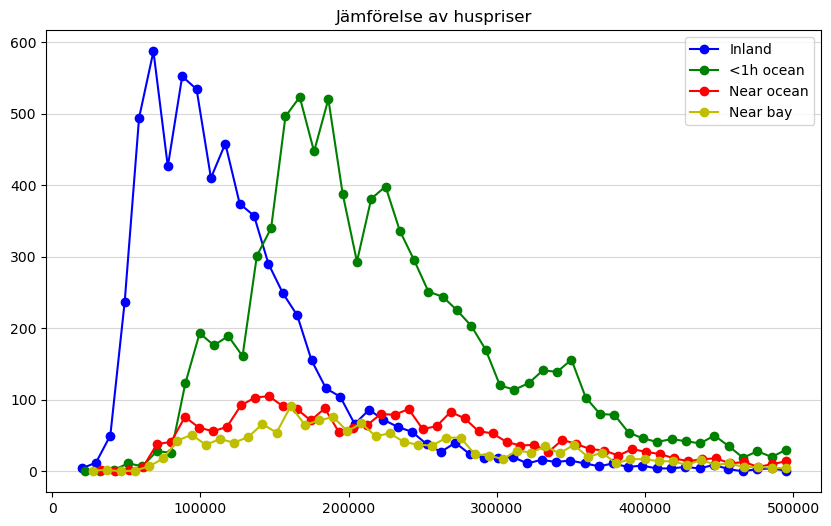

In [ ]:
bin_number = 50 # Sätter antal bin som en konstant för att lättare kunna ändras.

# Skapa dataset per kategori av ocean_proximity
inland_housing = housing[housing['ocean_proximity'] == 'INLAND']
oneh_ocean_housing = housing[housing['ocean_proximity'] == '<1H OCEAN']
near_ocean_housing = housing[housing['ocean_proximity'] == 'NEAR OCEAN']
near_bay_housing = housing[housing['ocean_proximity'] == 'NEAR BAY']
print(type(inland_housing)) # Kollar typen för eget lärande

# Skapa grafytan
fig, ax = plt.subplots(figsize=(10, 6))

# Beräkna histogram-datan
inland_counts, inland_bins = np.histogram(inland_housing['median_house_value'], bins=bin_number)
inland_bin_centers = 0.5 * (inland_bins[:-1] + inland_bins[1:])
print(type(inland_counts)) # Kollar typen för eget lärande
print(type(inland_bins)) # Kollar typen för eget lärande

oneh_counts, oneh_bins = np.histogram(oneh_ocean_housing['median_house_value'], bins=bin_number)
oneh_bin_centers = 0.5 * (oneh_bins[:-1] + oneh_bins[1:])

near_counts, near_bins = np.histogram(near_ocean_housing['median_house_value'], bins=bin_number)
near_bin_centers = 0.5 * (near_bins[:-1] + near_bins[1:])

near_bay_counts, near_bay_bins = np.histogram(near_bay_housing['median_house_value'], bins=bin_number)
near_bay_bin_centers = 0.5 * (near_bay_bins[:-1] + near_bay_bins[1:])

# Ritar linjegraferna i olika färger
ax.plot(inland_bin_centers, inland_counts, "b-o", label="Inland") # Blå
ax.plot(oneh_bin_centers, oneh_counts, "g-o", label="<1h ocean") # Grön
ax.plot(near_bin_centers, near_counts, "r-o", label="Near ocean") # Röd
ax.plot(near_bay_bin_centers, near_bay_counts, "y-o", label="Near bay") # Gul

# Lägger till titel och legend
ax.set_title("Jämförelse av huspriser")
ax.legend()
# Lägger till stödlinjer: True slår på den, vi väljer för y-axeln, alpha styr genomskinligheten
ax.grid(True, axis='y', alpha=0.5) #

plt.show()



Analys:

Peakarna på Inland och <1H är tydliga, dvs hus i regionen <1H är dyrare än Inland. Men svårare att jämför med near ocean/bay eftersom de har färre punkter och inte lika tydliga peakar. Near ocean (röd) verkar ha proportionerligt sett fler dyra hus. 

Boxplotar borde tydligare visa var huvuddelen av priserna ligger.

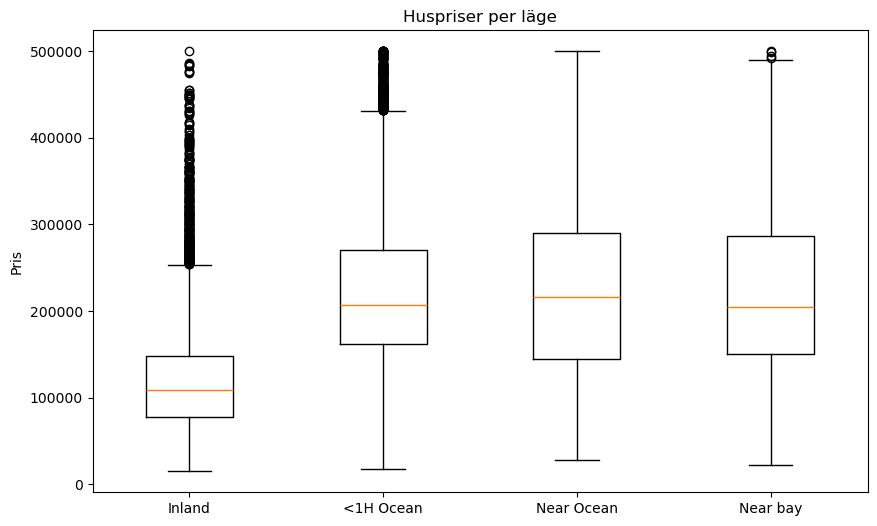

In [173]:
# Skapa grafytan
fig, ax = plt.subplots(figsize=(10, 6))

# Dataset med pris för respektive läge med hjälp av variablerna från tidigare steg
boxplot_data = [
    inland_housing['median_house_value'],
    oneh_ocean_housing['median_house_value'],
    near_ocean_housing['median_house_value'],
    near_bay_housing['median_house_value']
]

# Skapa boxplotten
# tick_labels anger namnen på x-axeln 
ax.boxplot(boxplot_data, tick_labels=['Inland', '<1H Ocean', 'Near Ocean', 'Near bay'])

# Titel och label för y-axeln
ax.set_title("Huspriser per läge")
ax.set_ylabel("Pris")

plt.show()

Analys:

Även om de finns en hel del dyra hus också i inlandet (ringarna) så ligger inlandet lägst vad gäller median och spridning för huspriser. Boxen, som visar var 50% av huspriserna, ligger helt under boxarna för de andra områdena.

Vi gör boxplots och för inkomst per ocean_proximity

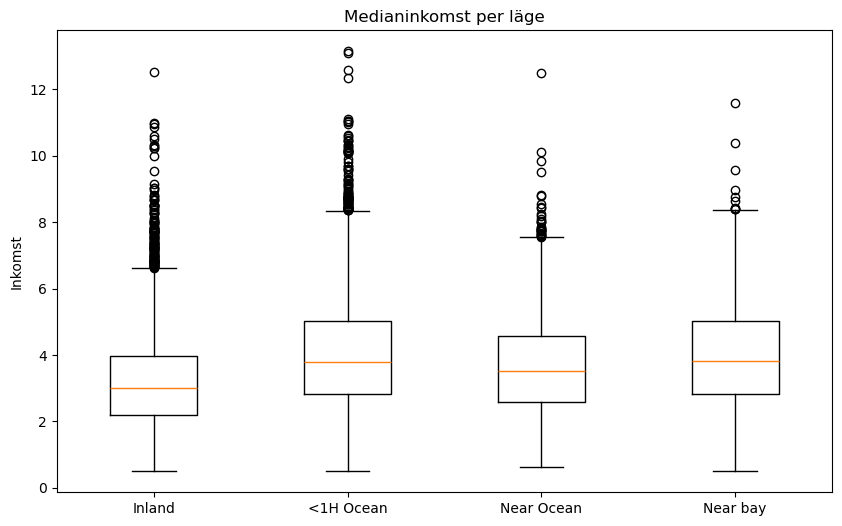

In [174]:
# Motsvarande för inkomst jämfört med hus-position

# Skapa grafytan
fig, ax = plt.subplots(figsize=(10, 6))

# Set med pris för respektive läge
boxplot_data = [
    inland_housing['median_income'],
    oneh_ocean_housing['median_income'],
    near_ocean_housing['median_income'],
    near_bay_housing['median_income']
]

# Skapa boxplotten
# labels= anger namnen på x-axeln
ax.boxplot(boxplot_data, tick_labels=['Inland', '<1H Ocean', 'Near Ocean', 'Near bay'])

# Titel och label för y-axeln
ax.set_title("Medianinkomst per läge")
ax.set_ylabel("Inkomst")

plt.show()

Analys:

Även om huspriserna var lägre i inlandet så skiljer sig inte medianinkomsterna lika tydligt, inlandet ligger dock något under. Om nu alla regioner ha ungefär samma lön, varför bosätter sig vissa då där huspriserna är lägre? Skulle kunna vara barnfamiljer dvs man har högre utgifter förutom boendet.

Nästa steg: Visning av longituder, latituder

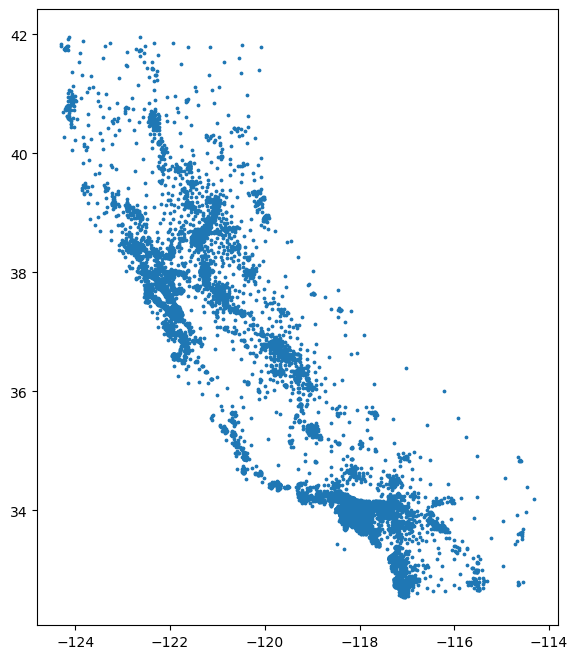

In [176]:
# Visning av distribution av koordinater
# Jag tog hjälp av gemini för att tips om hur man gör detta, och blev rekommenderad:
# - geopandas: en pandas-variant mer lämpad för geografisk data 
# - shapely: används ofta tillsammans med geopandas för att skapa geografiska punkter (point)

import geopandas as gpd
from shapely.geometry import Point

# Skapar geometri-kolumn (kod-grund genererad av gemini)
gdf = gpd.GeoDataFrame(
    housing,
    geometry=gpd.points_from_xy(housing.longitude, housing.latitude),
    crs="EPSG:4326"   # Anger standarden för long/lat-punkter på jordklotet
)

# Plotta punkterna
gdf.plot(figsize=(8, 8), markersize=3)
plt.show()


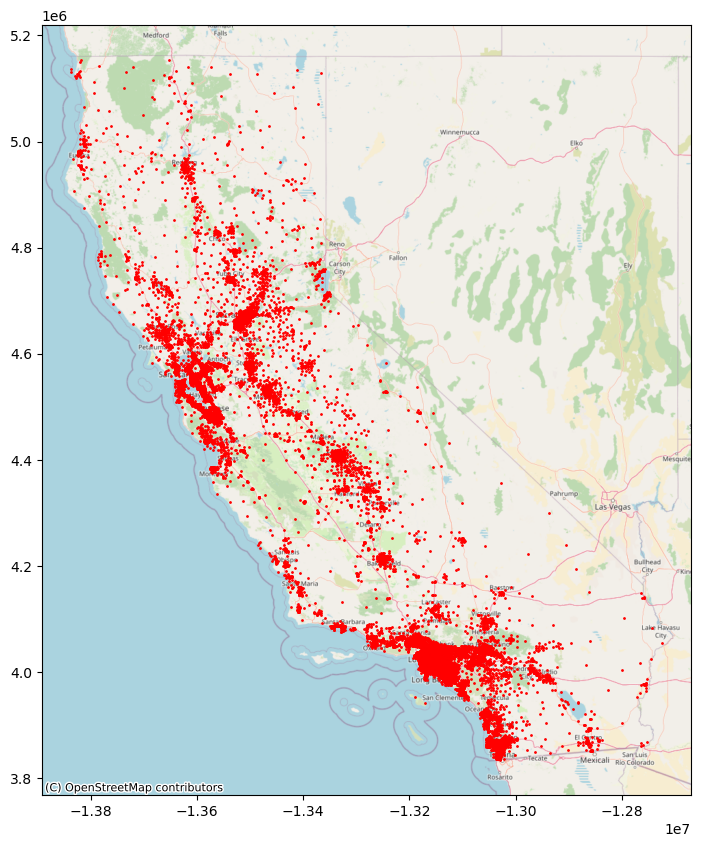

In [ ]:
# Provar att visa distribution av koordinater med karta som bakgrund
# För bakgrundskarta tog jag hjälp av gemini för vägledning och exempel:
# - contextily: orkestrerar bakgrundskartor i geografiska plottar

import contextily as ctx

# Konvertera till Web Mercator som väljer kartprojektion och enheter (kod-grund genererad av gemini)
gdf_web = gdf.to_crs(epsg=3857)

# Plotta punkterna (long/lat) i ax (kod-grund genererad av gemini)
ax = gdf_web.plot(figsize=(10, 10), markersize=1, color="red")

# Synkar bakgrundskarta till ax-punkterna, samt väljer karta (kod-grund genererad av gemini)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

plt.show()

Analys:

Och voilà, housing-datan är från Kalifornien. Dvs bay innebär San Francisco bay area, oceanen Stilla havet etc.

Det vore ju intressant att se hur ocean_proximity verkligen ser ut nu när vi vet kartan. Detta är bortom min kunskapsnivå av python, så jag tar hjälp av gemini återigen. Om det inte var syftet med uppgiften så bortse från dessa analyser.


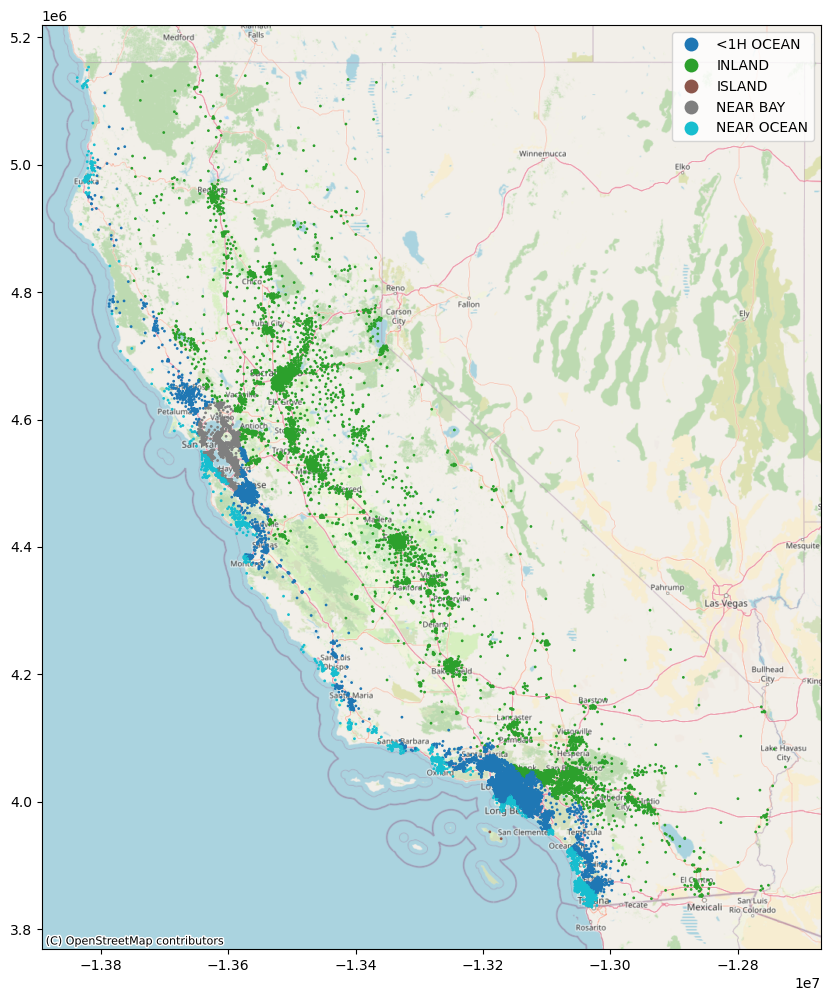

In [ ]:

# Plotta punkterna med färger baserat på ocean_proximity (kod-grund genererad av gemini)
ax = gdf_web.plot(
    figsize=(12, 12), 
    column='ocean_proximity', # Här länkar färg till värde av ocean_proximity
    categorical=True,         # Visar  att ocean_proximity är kategorier, inte siffror
    legend=True,              # Visa rutan som förklarar färgerna
    markersize=1,             # Storlek på prickarna
    #cmap='Set1'              # Färgschema kan sättas om man vill
)

# Lägger till bakgrundskarta återigen
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

plt.show()


Analys:

Här ser vi tydligt inland-punkterna och bay-punkterna som verkar stämma. Jag ser också en problematik i att man inte tar hänsyn till närhet till storstäder, LA i synnerhet. Möjlig förklaring till att <1h-husen är ungefär lika dyra som near ocean beror troligen på att medparten av husen i Los Angeles-hus räknats till <1h dvs "storstadspriserna". 

Som förslag till fortsatt analys skulle vara att själv utöka ocean_proximity och gruppera punkter nära storstäder och därifrån titta på huspriser mm igen.



Nästa steg: scatterplots för att överblicka korrelationer. Där vi tittar på husvärde respektive inkomst med avseende på population och två nya mätpunkter som jag inför:
- Antal personer per hushåll (population/households), som skulle kunna indikera t ex områden med många barnfamiljer
- Antal rum per sovrum (rooms/bedrooms), som skulle kunna indikera hur exklusivt boendet är: en högre ratio indikerar att man har råd med extrarum

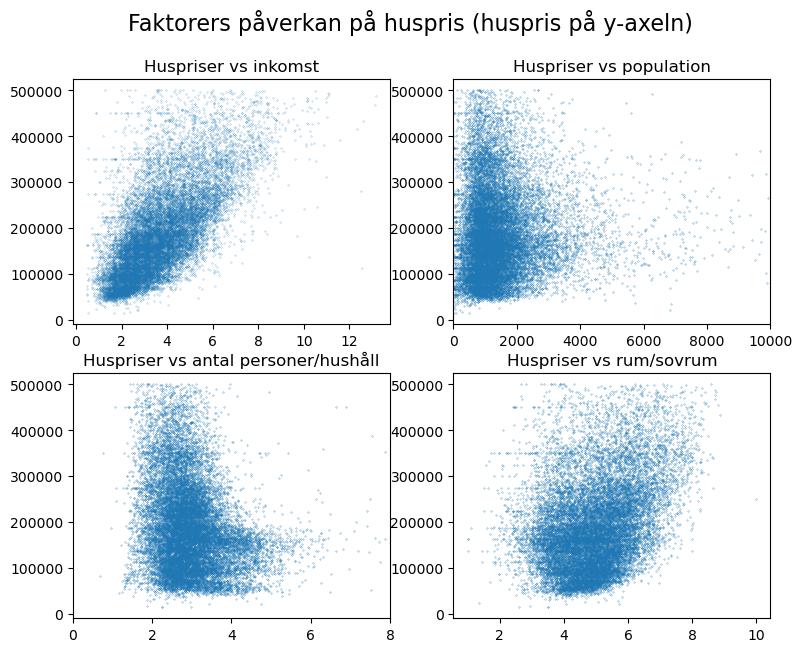

In [187]:
# Analys med avseende på husvärde

fig, axs = plt.subplots(2, 2, figsize=(9, 7))
axs[0, 0].scatter(housing["median_income"], housing["median_house_value"], marker='.', s=0.1) 
axs[0, 0].set_title("Huspriser vs inkomst") # Titel på plot
axs[0, 1].scatter(housing["population"], housing["median_house_value"], marker='.', s=0.2) 
axs[0, 1].set_title("Huspriser vs population") # Titel på plot
axs[0, 1].set_xlim(0, 10000) # Exkluderar outliers genom att begränsa skalan
persons_per_household = housing["population"]/housing["households"] 
axs[1, 0].scatter(housing["population"]/housing["households"], housing["median_house_value"], marker='.', s=0.2) 
axs[1, 0].set_title("Huspriser vs antal personer/hushåll") # Titel på plot
axs[1, 0].set_xlim(0, 8) # Exkluderar outliers genom att begränsa skalan
axs[1, 1].scatter(housing["total_rooms"]/housing["total_bedrooms"], housing["median_house_value"], marker='.', s=0.2) 
axs[1, 1].set_title("Huspriser vs rum/sovrum") # Titel på plot

fig.suptitle("Faktorers påverkan på huspris (huspris på y-axeln)", fontsize=16)
plt.show()

Analys:
1. Huspriser visar viss korrelation med inkomst utifrån "kvasten" som bildas i scatterplotten.
  - Kvasten har dock slagida, vid högre inkomster har man nästan alltid dyrare hus, men dyrare hus finns också vid lägre inkomster: en förklaring till det är att man har pengar (t ex ärvda eller ihoptjänade tidigare) och har råd med ett exklusivt boende även om den deklarerade inkomsten idag är låg.*
2. De dyrare husen ligger sällan i områden med högre population, man kan tänka sig att områden med högre population blir mer tätbefolkade och mindre attraktiva för exklusivare byggen t ex förorter.
3. Medeldyra och dyra hus ligger uteslutande i områden med medel på under 3, en gissning är att områdena har många två-personshushåll,  vilka kan tendera att ha mer pengar, och färre hushåll med högre medeltal. Områden med medelantal på 4-5, gissningsvis stora familjer med många barn vilket kan indikera lägre socioekonomisk status, har tydligt lägre huspriser. Man kan också notera att det finns en hel del prickar på <2 personer/hushåll, dvs dessa områden måste många enpersonshushåll (vad det nu kan innebära...).
4. Vid högre ratio av rum/sovrum så finns en svag indikation för korrelation mot högre huspriser. Känns rimligt att med välbärgade hem har fler rum som inte är sovrum; något som för många är en lyx.

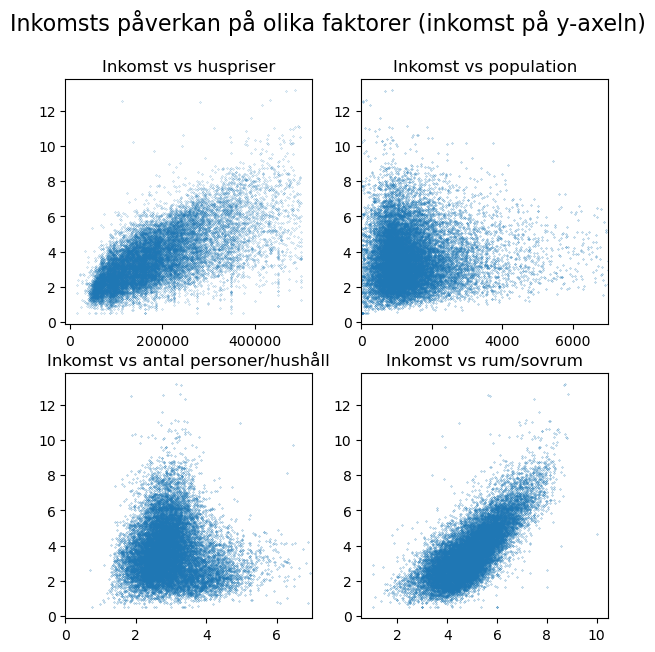

In [189]:
# Motsvarande analys med avseende på inkomst

fig, axs = plt.subplots(2, 2, figsize=(7, 7))
axs[0, 0].scatter(housing["median_house_value"], housing["median_income"], marker='.', s=0.1) 
axs[0, 0].set_title("Inkomst vs huspriser") # Titel på plot
axs[0, 1].scatter(housing["population"], housing["median_income"], marker='.', s=0.2) 
axs[0, 1].set_title("Inkomst vs population") # Titel på plot
axs[0, 1].set_xlim(0, 7000) # Exkluderar outliers genom att begränsa skalan
axs[1, 0].scatter(housing["population"]/housing["households"], housing["median_income"], marker='.', s=0.2) 
axs[1, 0].set_title("Inkomst vs antal personer/hushåll") # Titel på plot
axs[1, 0].set_xlim(0, 7) # Exkluderar outliers genom att begränsa skalan
axs[1, 1].scatter(housing["total_rooms"]/housing["total_bedrooms"], housing["median_income"], marker='.', s=0.2) 
axs[1, 1].set_title("Inkomst vs rum/sovrum") # Titel på plot

fig.suptitle("Inkomsts påverkan på olika faktorer (inkomst på y-axeln)", fontsize=16)
plt.show()

Analys

1. Samma som tidigare
2. Högre inkomster har en tendens att ligga i områden med lägre population t ex förorter
3. Lägre inkomster både vid högre personer/hushåll (t ex fler barn och lägre socioekonomisk nivå), och <2 hushåll (t ex vissa grupper av ensamstående som pensionärer, studenter kan ha lägre inkomst)
4. Inkomst ger allmänt mer definierade plottar och då också korrelationer, speciellt för rum/sovrum. Troligen i linje med * ovan dvs man har gott om pengar även om man inte råkar ha en stor inkomst just nu. Inkomst korrelerar klart tydligare än huspriser (mindre spretig scatterplot) mot rum/sovrum: har man hög inkomst har man oftast ett dyrt hus, men många med dyrt hus har pengar sen tidigare och inte nörvändigtvis en stor inkomst i stunden.

Avslutande analys

- Kalifornien med stora städer, exklusiva områden och stora socioekonomiska klyftor är ett typexempel på vad som kan vara svårt att fånga i ett dataset med få dimensioner. Framför allt att inte Los Angeles kan särskiljas på ett bra sätt.
- Inget direkt oväntat kunde utläsas av datan, t ex närhet till bay area och vatten är såklart mer exklusivt; högre husvärde och fler extrarum indikerar också bättre ekonomi.
- För att lyfta en parameter som jag inte såg innan analysen: ration rum/sovrum. Så indikerar den också välstånd i ett område.
- Outliers: kommer data från t ex fysiska mätningar eller sensorer får man ofta outliers i form av helt felaktig data, t ex snöfall kommer påverka rörelsedetaktorer. För samhällsdata som i housing är det svårare att se att data är direkt felaktig och det är svårt att avgöra vad outlier-data avspeglar. T ex medelantal personer per hushåll fick 3-4 värden i intervallet 500-1000, (dessa syns inte i scatterplotten då jag begränsade den visade skalan): både antal hushåll och befolkning torde ju vara ganska robust data och det är svårt att se hur den datan tillkommit. Här skulle man i fortsatt analys spåra upp de aktuella områdena och titta närmare på de raderna, och troligen radera dem som felaktiga outliers. Även andra likande orimliga värden skulle kunna analyseras/raderas på samma sätt.
- Linjegrafer kan vara svåra att läsa om det är olika mängder så där gav boxplot en bättre överblick av medel och distribution. 
-Scatterplots kan vara svåra att uttyda om det är många punkter på samma ställe (möjligen skulle heatmaps kunna vara ett bättre alternativ)
- Som nämnt ovan skulle vidare analys kunna ta hänsyn till närhet till storstäder (geopandas borde väl kunna filtrera ut sånt)


Självutvärdering

1. Mest utmanande: att ligga i fas med utbildningen. Jag jobbar heltid och har barn varannan vecka vilket innebär att jag kan fokusera olika mycket på utbildningen olika veckor. Men det har löst sig och jag hoppas det löser sig under våren också.

2. Betyg på uppgiften: jag tyckte det sas under kursen att det inte var en så stor uppgift, men det har blivit så att jag nog lagt ner mer tid än vad som vad menat. Och om jag lyckats vara produktiv under den tiden så borde det innebära betyg VG. Men betyg ska såklart avspegla kvalitet resultat, slutsatser mm snarare än kvantitet.  

3. Bra lärarinsats som fångat alla nivåer på studenterna! Det är ok att ligga efter i kursen (som jag själv ibland) men om det blir frågor som rör för gammalt material så får man se till att inte fastna där för länge.